<a href="https://colab.research.google.com/github/thayyilakul/Tensorflow-ML/blob/main/Fashion_MNIST_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
print(f'Training sample data: \n{train_data[0]}')
print(f'Test sample data: {train_labels[0]}')

Training sample data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

In [12]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

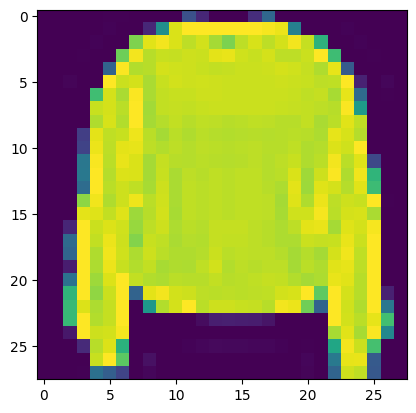

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [14]:
train_labels[7]

2

In [15]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

In [16]:
class_names[train_labels[7]]

'Pullover'

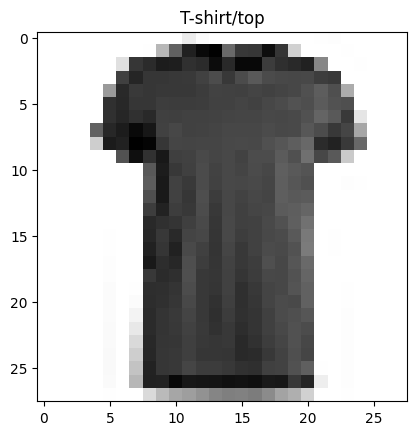

In [21]:
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]]);

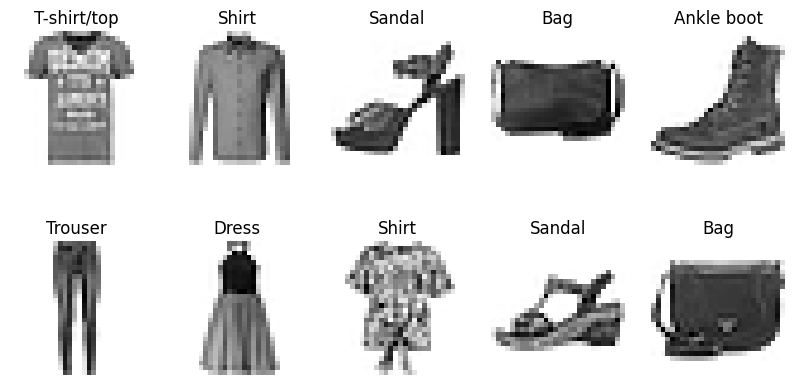

In [45]:
import random
plt.figure(figsize = (10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis('off')

In [47]:
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_0.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

non_norm_hist = model_0.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1146 - loss: 3.6160 - val_accuracy: 0.1816 - val_loss: 2.1117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1729 - loss: 2.1051 - val_accuracy: 0.2086 - val_loss: 2.0037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2213 - loss: 1.9047 - val_accuracy: 0.2474 - val_loss: 1.7401
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2553 - loss: 1.7242 - val_accuracy: 0.2582 - val_loss: 1.7318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2775 - loss: 1.6814 - val_accuracy: 0.2862 - val_loss: 1.6670
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2909 - loss: 1.6573 - val_accuracy: 0.3007 - val_loss: 1.6427
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3015 - loss: 1.6397 - val_accuracy: 0.2962 - val_loss: 1.6313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3164 - loss: 1.6086 - 

In [48]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [50]:
train_data.min(), train_data.max()

(0, 255)

In [51]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [54]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

norm_hist = model_1.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3461 - loss: 1.6821 - val_accuracy: 0.5559 - val_loss: 1.1564
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6035 - loss: 1.1035 - val_accuracy: 0.6470 - val_loss: 1.0025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6586 - loss: 0.9834 - val_accuracy: 0.6680 - val_loss: 0.9497
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6749 - loss: 0.9357 - val_accuracy: 0.6818 - val_loss: 0.9155
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6810 - loss: 0.9078 - val_accuracy: 0.6889 - val_loss: 0.8967
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6876 - loss: 0.8891 - val_accuracy: 0.6907 - val_loss: 0.8851
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6913 - loss: 0.8759 - val_accuracy: 0.6956 - val_loss: 0.8756
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6953 - loss: 0.8649 - 

<Axes: title={'center': 'Normalized History'}>

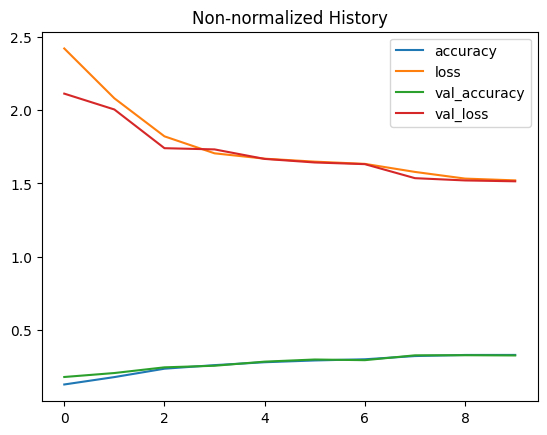

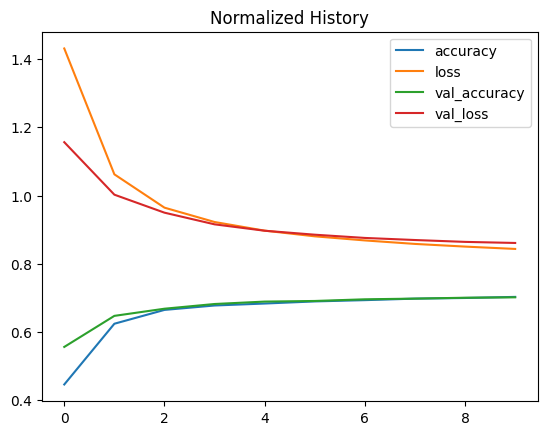

In [55]:
import pandas as pd
pd.DataFrame(non_norm_hist.history).plot(title = 'Non-normalized History')
pd.DataFrame(norm_hist.history).plot(title = 'Normalized History')

In [59]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_2.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model_2.fit(train_data, train_labels, epochs = 40, validation_data = (test_data, test_labels), callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3908 - loss: 1.6178 - val_accuracy: 0.6701 - val_loss: 0.9554 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6819 - loss: 0.8861 - val_accuracy: 0.7051 - val_loss: 0.7962 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7082 - loss: 0.7708 - val_accuracy: 0.7092 - val_loss: 0.7612 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7157 - loss: 0.7322 - val_accuracy: 0.7150 - val_loss: 0.7428 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7219 - loss: 0.7107 - val_accuracy: 0.7168 - val_loss: 0.7335 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7262 - loss: 0.6961 - val_accuracy: 0.7175 - val_loss: 0.7182 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7290 - l

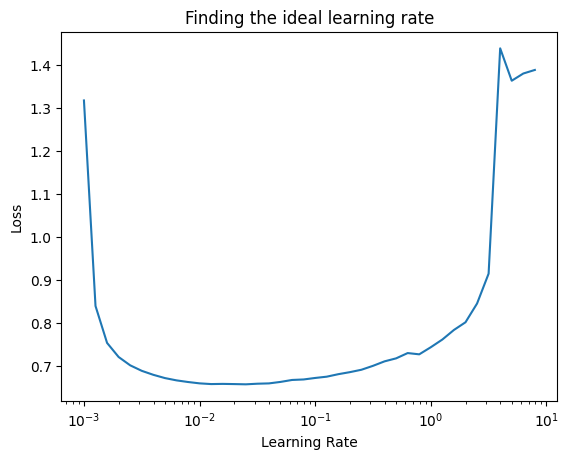

In [61]:
import numpy as np
lrs = 1e-3*(10**(np.arange(40)/10))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate');

In [62]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_3.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history = model_3.fit(train_data, train_labels, epochs = 20, validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4343 - loss: 1.5302 - val_accuracy: 0.7603 - val_loss: 0.7123
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7807 - loss: 0.6606 - val_accuracy: 0.7884 - val_loss: 0.6227
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7994 - loss: 0.5923 - val_accuracy: 0.7979 - val_loss: 0.5932
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8091 - loss: 0.5644 - val_accuracy: 0.8030 - val_loss: 0.5788
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8138 - loss: 0.5476 - val_accuracy: 0.8061 - val_loss: 0.5707
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8170 - loss: 0.5363 - val_accuracy: 0.8081 - val_loss: 0.5645
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8190 - loss: 0.5279 - val_accuracy: 0.8093 - val_loss: 0.5595
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8220 - loss: 0.5213 - 

In [72]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix", xlabel="Predicted label", ylabel="True label", xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f})*',
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > threshold else 'black',
             size = text_size)

In [66]:
y_probs = model_3.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[2.98984087e-05, 5.44679649e-11, 1.99913325e-06, 8.15401719e-08,
        1.27884192e-09, 2.96213806e-01, 1.34244074e-05, 1.03466555e-01,
        7.01169120e-05, 6.00204110e-01],
       [2.44177831e-03, 1.40778520e-05, 9.19000506e-01, 9.20367347e-06,
        1.58075728e-02, 1.31574274e-18, 6.27254546e-02, 0.00000000e+00,
        1.24722328e-06, 0.00000000e+00],
       [7.05901766e-05, 9.99392629e-01, 2.89738120e-04, 1.56845825e-04,
        8.28017583e-05, 3.43382380e-14, 7.26383496e-06, 5.38329834e-33,
        1.01929845e-11, 2.57274063e-23],
       [3.82111684e-05, 9.98086452e-01, 4.23170286e-06, 1.85903593e-03,
        1.11080008e-05, 3.60964026e-13, 8.23803305e-07, 6.03808307e-32,
        2.08020580e-12, 1.40456392e-19],
       [2.10007489e-01, 5.11482067e-04, 1.70610428e-01, 5.80396578e-02,
        5.17487824e-02, 4.40724887e-11, 5.08571982e-01, 2.73567525e-35,
        5.10087411e-04, 5.48101065e-29]], dtype=float32)

In [67]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [68]:
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [70]:
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[730,  14,  15,  85,  10,   5, 128,   0,  13,   0],
       [  2, 956,  10,  24,   5,   0,   2,   0,   1,   0],
       [ 20,  13, 702,  14, 174,   1,  75,   0,   1,   0],
       [ 31,  31,   4, 836,  45,   2,  47,   0,   4,   0],
       [  1,   4,  91,  29, 819,   0,  53,   0,   3,   0],
       [  0,   0,   0,   0,   0, 916,   0,  41,  10,  33],
       [138,  10, 124,  56, 184,   2, 470,   0,  16,   0],
       [  0,   0,   0,   0,   0,  41,   0, 927,   3,  29],
       [  0,   0,   2,  14,  15,  15,  61,   4, 889,   0],
       [  1,   0,   0,   0,   0,  36,   0,  55,   1, 907]])

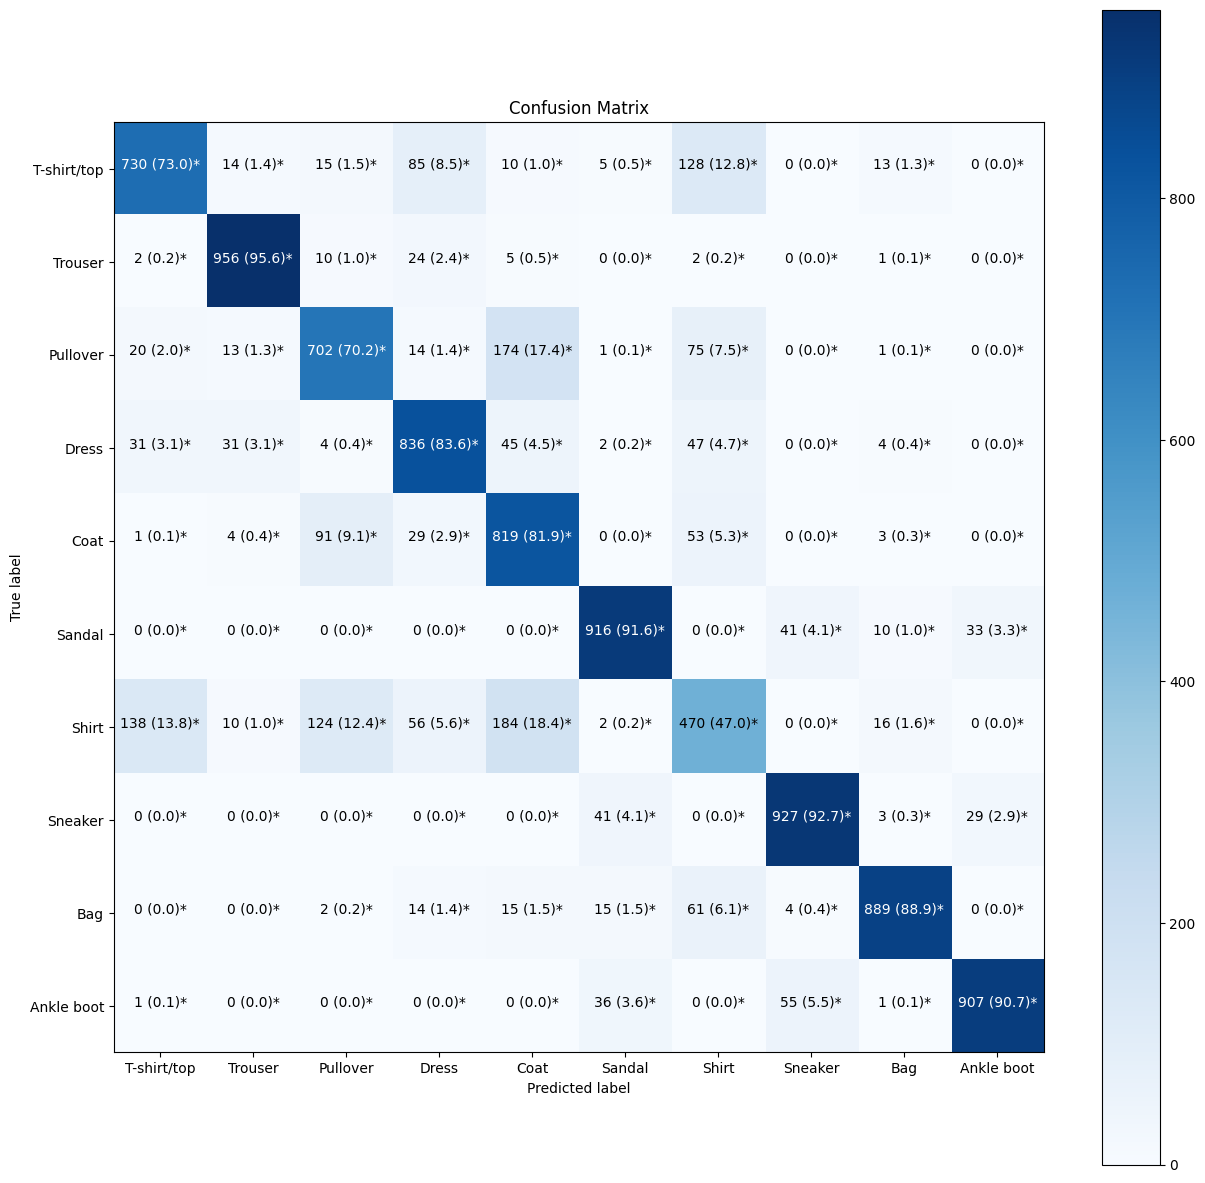

In [73]:
make_confusion_matrix(y_true = test_labels, y_pred = y_preds, classes = class_names, figsize = (15, 15), text_size = 10)

In [77]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred : {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


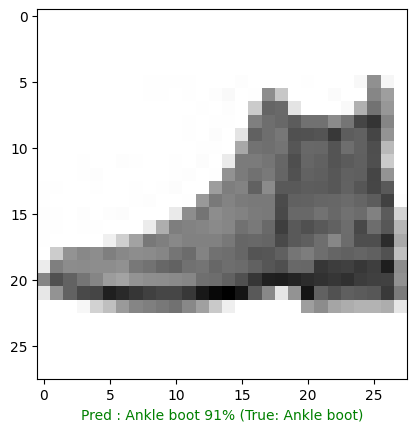

In [82]:
plot_random_image(model_3, test_data, test_labels, class_names)

In [83]:
model_3.layers

[<Flatten name=flatten_7, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>]

In [84]:
model_3.layers[1]

<Dense name=dense_19, built=True>

In [87]:
weights, biases = model_3.layers[1].get_weights()
weights, biases

(array([[-0.4881415 , -0.69750524,  0.5366517 ,  0.3589799 ],
        [-0.8368572 ,  0.2012945 ,  0.73366225, -0.01228958],
        [-0.91797084, -0.5965198 ,  0.24622114,  0.84535885],
        ...,
        [-0.14449054, -0.31361997, -0.14273123,  0.3895555 ],
        [-0.29094112, -0.86818135, -0.11119629, -0.32514244],
        [-0.09030859, -0.40539408,  0.60484254,  0.1529983 ]],
       dtype=float32),
 array([-0.18815012,  1.325256  ,  0.4065829 ,  1.2900332 ], dtype=float32))

In [88]:
weights.shape, biases.shape

((784, 4), (4,))

In [89]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

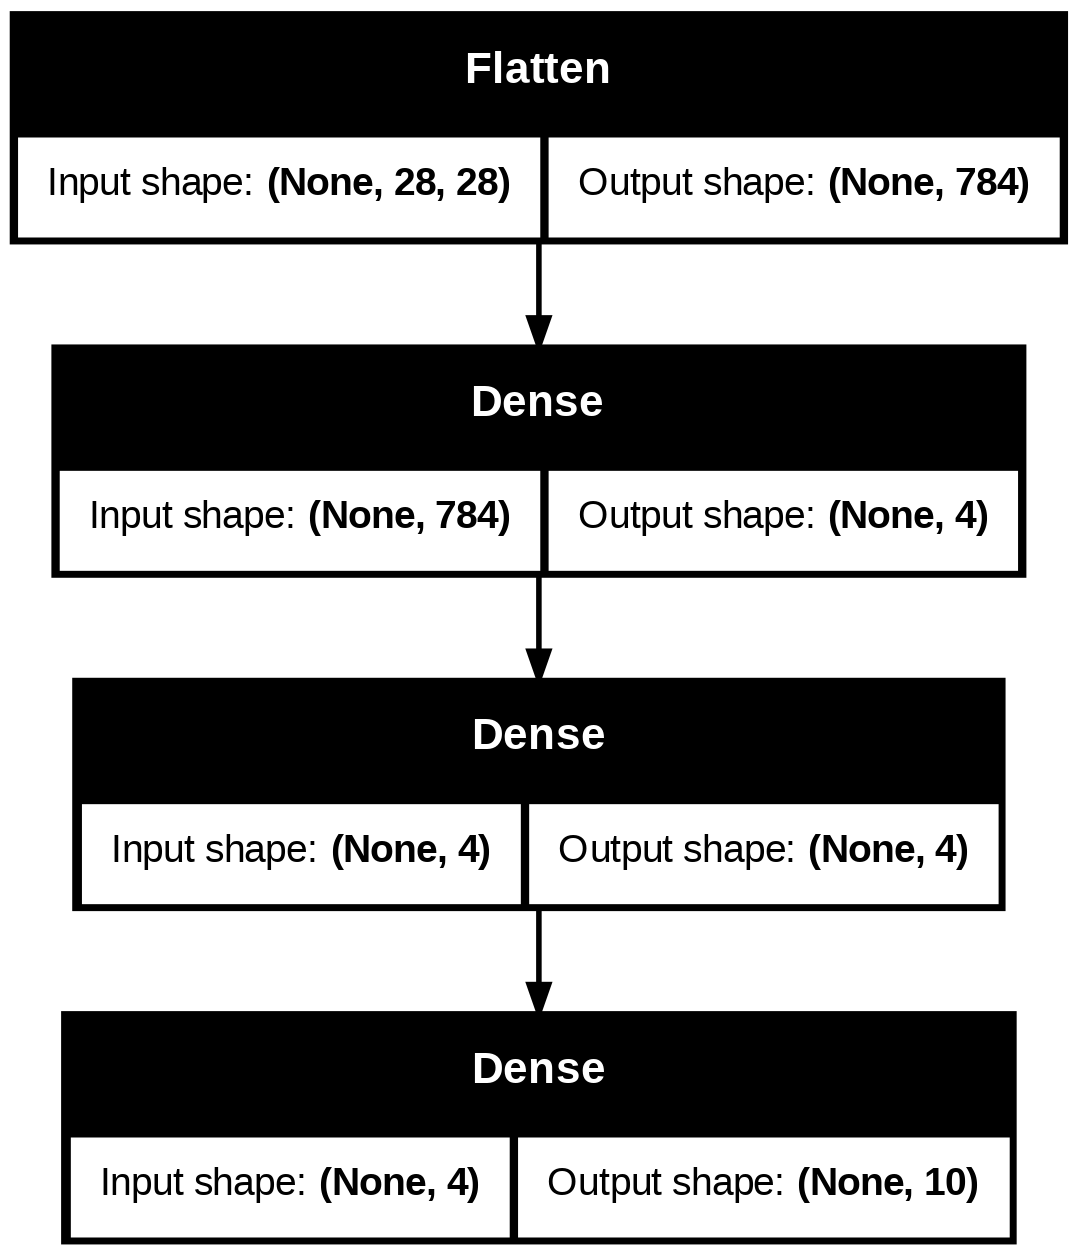

In [91]:
plot_model(model_3, show_shapes = True)